# Analysis & Visualisation of the IMDb Top 250

The Notebook investigates the following aspects:

1. **The evolution of cinema (temporal trends)**
   1. Were older movies longer or shorter than nowadays? How did the duration change during the years?
   2. Do older movies have more votes than newer ones? <br>
2. **The secrets of good ratings (factors influencing ratings)** 
   1. Were old movies better? (Nostalgia Effect)
   2. Do longer movies have better ratings?
   3. Do movies with more votes tend to have higher ratings?
   4. Does the certification rating influence the rating of the movie? <br>
3. **Correlations and Behaviour (Deep Dive)**
   1. How does the duration of the movie influence the amount of votes?
   2. Does the title length correlate with rating or popularity?
   3. Are there any "Hidden Gems" (High-Rated movies with low vote count vs. Blockbusters)

## Imports and Quick Overview of the Data

In [27]:
# Imports and loading data
# Data Storage and Manipulation
import pandas as pd
import numpy as np

# Visualisation Tools
import matplotlib.pyplot as plt
import seaborn as sns
from functions import show_grid

# random seed for reproducibility
np.random.seed(42)

# loading the data
imdb_data = pd.read_csv('imdb_top_250.csv')

# displaying first outcomes
imdb_data.head()

,Title,Year,Duration (min),Duration (secs),Rating,Votes,Certification Rating
0,The Shawshank Redemption,1994,142,8520,9.3,3131912,R
1,The Godfather,1972,175,10500,9.2,2185484,R
2,The Dark Knight,2008,152,9120,9.1,3107811,PG-13
3,The Godfather Part II,1974,202,12120,9.0,1469364,R
4,12 Angry Men,1957,96,5760,9.0,962954,Approved


In [28]:
# getting an overview of the data
imdb_data.describe()

,Year,Duration (min),Duration (secs),Rating,Votes
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,1988.760000,131.636000,7898.160000,8.311200,7.462162e+05
std,25.584383,35.741928,2144.515704,0.229795,6.135539e+05
min,1921.000000,45.000000,2700.000000,8.000000,2.707100e+04
25%,1973.000000,109.000000,6540.000000,8.100000,2.370015e+05
50%,1995.500000,127.500000,7650.000000,8.200000,6.030545e+05
75%,2009.000000,147.750000,8865.000000,8.400000,1.122764e+06
max,2025.000000,374.000000,22440.000000,9.300000,3.131912e+06


In [29]:
# checking for missing values
missing_values_count = imdb_data.isnull().sum()

missing_values_count

Title                   0
Year                    0
Duration (min)          0
Duration (secs)         0
Rating                  0
Votes                   0
Certification Rating    5
dtype: int64

##### Observation:

- data looks clean, no outliers, weird data or stuff
- only 5 missing values at certification

## 1. The Evolution of Cinema

###  1.1 Were older movies longer or shorter than nowadays? How did the duration change during the years?

In [30]:
# preparing the data and storing it into a new dataframe
duration_by_year = imdb_data.groupby('Year')['Duration (min)'].mean().reset_index()

# checking if the data is stored correctly
duration_by_year.head()

,Year,Duration (min)
0,1921,68.0
1,1924,45.0
2,1925,95.0
3,1926,78.0
4,1927,153.0


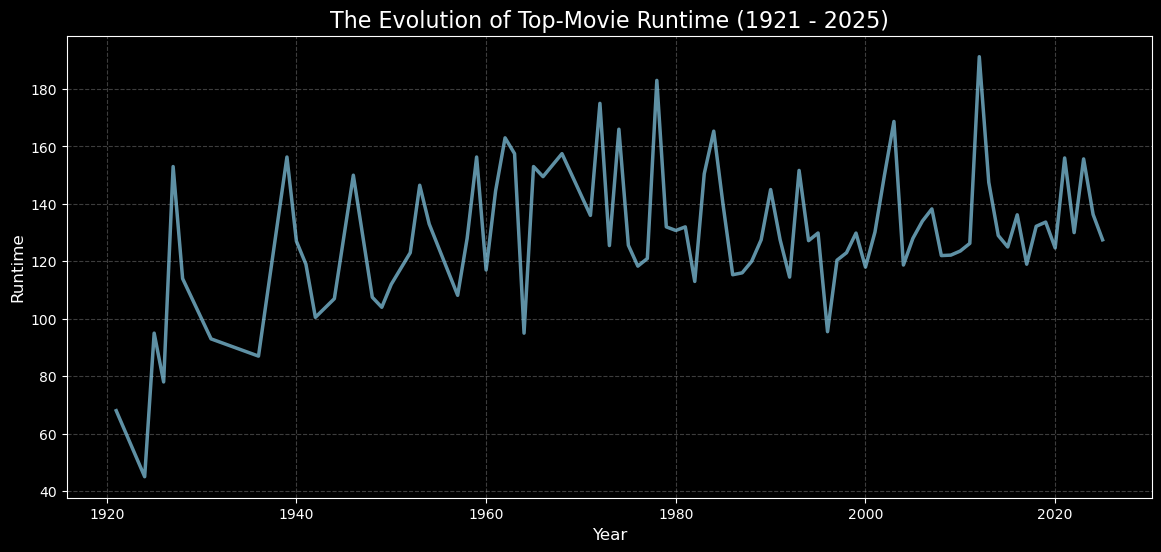

In [31]:
# Visualisation
# setup
plt.style.use('dark_background')
plt.figure(figsize=(14,6))

# plotting
ax = sns.lineplot(data=duration_by_year,
             x='Year', y='Duration (min)',
             color='skyblue',  alpha=0.7,
             linewidth=2.5)

# displaying a grid for readability
show_grid()

# labeling
ax.set_title('The Evolution of Top-Movie Runtime (1921 - 2025)', fontsize=16)
ax.set_ylabel('Runtime', fontsize=12)
ax.set_xlabel('Year', fontsize=12)
plt.show()



##### Conclusion & Observation

- A historical shift is clearly visible, showing a significant upward trend when comparing the early cinema era (1920-1930) to modern times. <br> There were much shorter formats in the early era.

- The graph is highly volatile with sharp peaks reaching 160-180 minutes. This represents the nature of the Top 250 dataset: <br> 
  Highly-rated masterpieces often tend to be long Epics (e.g., The Godfather, Lord of the Rings), causing these spikes

- Since the 1960's the runtime has stabilized. It rarely drops below 110 minutes, clustering slightly around the 120-minute mark, suggesting a 2-hour standard in the movie industry
---
**Follow Up Question:**

Which movies were the longest and when were they published?


In [32]:
# sorting the DataFrame to get the top 5 longest movies (in seconds do see the it exactly)
print('The Top 5 longest movies:')
imdb_data.sort_values(by='Duration (secs)', ascending=False).head()

The Top 5 longest movies:


,Title,Year,Duration (min),Duration (secs),Rating,Votes,Certification Rating
158,The Best of Youth,2003,374,22440,8.4,27071,R
244,Gangs of Wasseypur,2012,321,19260,8.2,111978,Not Rated
163,Gone with the Wind,1939,238,14280,8.2,352604,G
88,Once Upon a Time in America,1984,229,13740,8.3,403465,R
98,Lawrence of Arabia,1962,227,13620,8.3,336619,Approved


### 1.2 Do older movies have more votes than newer ones?

In [33]:
# preparing the data again (for the lineplot)
votes_by_year = imdb_data.groupby('Year')['Votes'].mean().reset_index()

# quickly observing the data
votes_by_year.head()

,Year,Votes
0,1921,144024.0
1,1924,64351.0
2,1925,126735.0
3,1926,104897.0
4,1927,198605.0


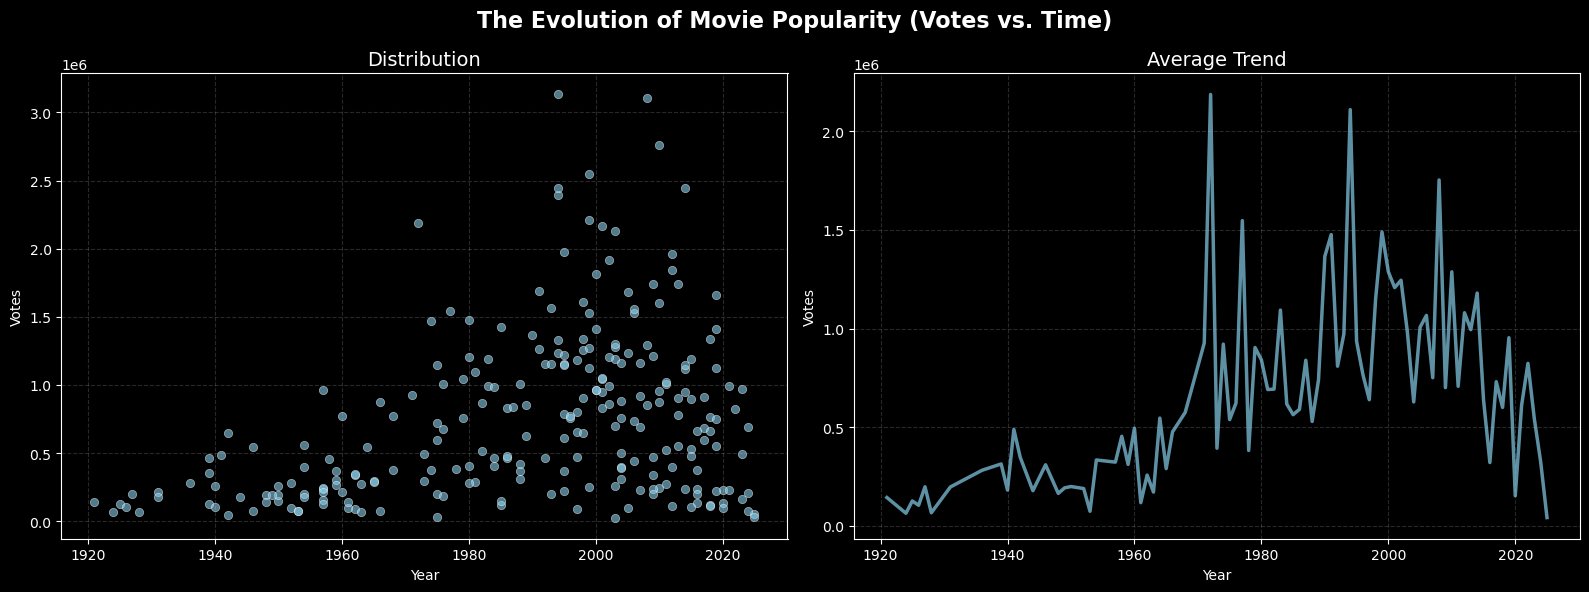

In [34]:
# visulaisation via a subplot to show the true values and the trend
# setup
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# plotting the scatterplot
ax1 = sns.scatterplot(data=imdb_data,
                     x='Year', y='Votes',
                     color='skyblue', alpha=0.6,
                     edgecolor="#ffffffff",
                     ax=axes[0])

# plotting the lineplot 
ax2 = sns.lineplot(data=votes_by_year,
                  x='Year', y='Votes',
                  color='skyblue', alpha=0.7,
                  linewidth=2.5,
                  ax=axes[1])

# setting up a grid for readability
for ax in axes:
    ax.grid(True,
         linestyle='--',
         linewidth=0.8,
         alpha=0.2,
         color='#cccccc'
         )

# labeling
fig.suptitle('The Evolution of Movie Popularity (Votes vs. Time)', fontsize=16, weight='bold')
axes[0].set_title('Distribution', fontsize=14)
axes[1].set_title('Average Trend', fontsize=14)

plt.tight_layout()
plt.show()

##### Conclusion & Observation

- Movies from the early cinema era (1920-1960) show significantly lower vote counts. <br> Even masterpieces from this time are less "mass-consumed" by the modern internet audience compared to recent blockbusters.

- There is a massive surge in votes starting in the 1990s, peaking around the early 2000s. <br> This likely correlates with the demographics of the active IMDb user base, who grew up with films from this era 

- Interestingly, the vote count drops again for the most recent years (2015-2025). <br> This confirms the hypothesis that it takes time for a movie to accumulate "Cult Status" and gather millions of votes – a new movie hasn't had the 20 years of exposure that a 2000s classic has.

---
**Follow Up Question:**

Which movies have the most votes and in which year were they published?

In [35]:
# sorting the DataFrame to get the top 5 most voted movies
print('The Top 5 most-voted movies:')
imdb_data.sort_values(by='Votes', ascending=False).head()

The Top 5 most-voted movies:


,Title,Year,Duration (min),Duration (secs),Rating,Votes,Certification Rating
0,The Shawshank Redemption,1994,142,8520,9.3,3131912,R
2,The Dark Knight,2008,152,9120,9.1,3107811,PG-13
13,Inception,2010,148,8880,8.8,2761957,PG-13
12,Fight Club,1999,139,8340,8.8,2546868,R
11,Forrest Gump,1994,142,8520,8.8,2447873,PG-13


## 2. The Secrets of High Ratings

### 2.1 Were old movies better? (Nostalgia Effect)

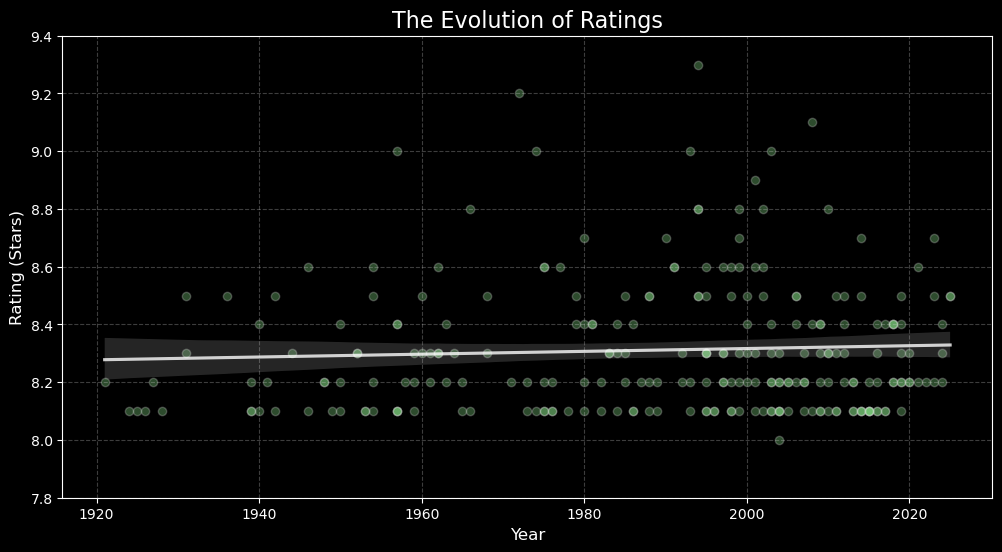

In [36]:
# Starting with Visualisation
# setup
plt.figure(figsize=(12,6))

# plotting the scatterplot with regression line
ax = sns.regplot(data=imdb_data,
            x='Year', y='Rating',
            color='palegreen',
            scatter_kws={'alpha':0.3, 'edgecolor': '#cccccc'},
            line_kws={'color': 'white', 'alpha':0.8})

# limiting the values
ax.set_ylim(bottom=7.8, top=9.4)

# displaying a grid for readability
show_grid()

# labeling
ax.set_title('The Evolution of Ratings', fontsize=16)
ax.set_ylabel('Rating (Stars)', fontsize=12)
ax.set_xlabel('Year', fontsize=12)

plt.show()


##### Conclusions & Observations

- **Myth Busted**: The regression line is nearly flat, indicating no significant correlation between the release year and the rating. Older movies are not inherently "better" rated than modern ones.

- We see "tops and flops" (ratings between 8.0 and 9.3) distributed across all decades. This suggests that quality in the Top 250 is timeless.

- The most striking observation is the density of data points. The plot is sparsely populated before 1980 and becomes very dense afterwards. <br> 
  This implies a "Recency Bias" in the Top 250 list: While older movies aren't rated worse, significantly fewer of them manage to stay in the list compared to modern films.

---

**Follow Up Question:**

Which timeperiods have the most movies in the top 250 list?

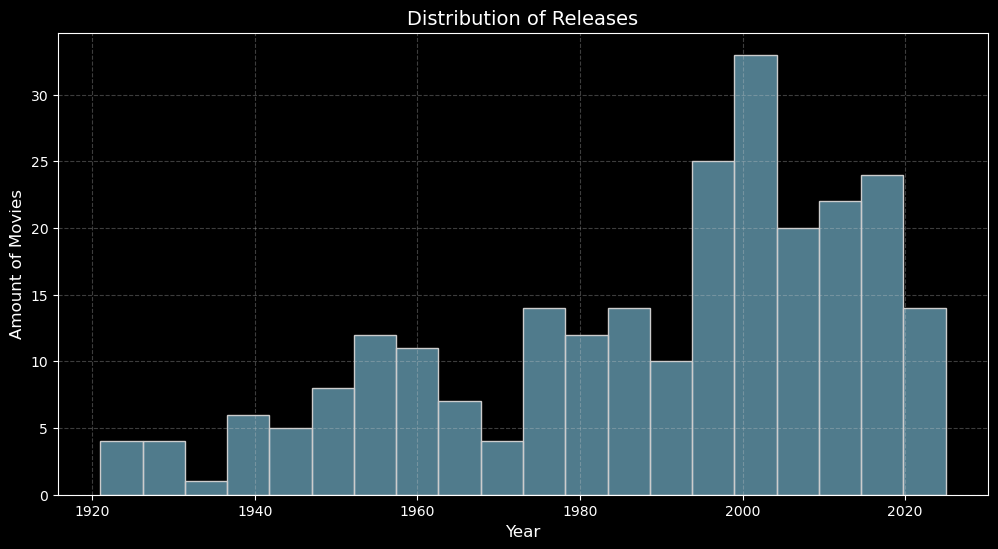

In [37]:
# Visualisation
# setup
plt.figure(figsize=(12,6))

# creating a histplot to show the distribution
ax = sns.histplot(data=imdb_data, 
             x='Year', bins=20, 
             color='skyblue', alpha=0.6,
             edgecolor='#cccccc')

# displaying a grid for readability
show_grid()

# labeling
ax.set_title('Distribution of Releases', fontsize=14)
ax.set_ylabel('Amount of Movies', fontsize=12)
ax.set_xlabel('Year', fontsize=12)

plt.show()

##### Follow Up Results:
- Recency Bias Confirmed: The histogram clearly shows that the majority of the Top 250 movies were released after 1990, with a significant peak between 1995 and 2005. <br> This contradicts the idea that "old movies were better"; rather, modern movies have a higher chance of entering the list due to a younger voting demographic.

- The low count of movies before 1960 doesn't necessarily mean they were worse. <br> It implies a high barrier to entry: Only the absolute "Cinematic Legends" from that era manage to stay relevant enough to garner high ratings in 2024.

- Interesting to note is the dip in the most recent bin (2015-2025). This suggests that while new movies are popular, they need time to cement their status as "Top 250 worthy" classics.

### 2.2 Do longer movies have better Ratings?

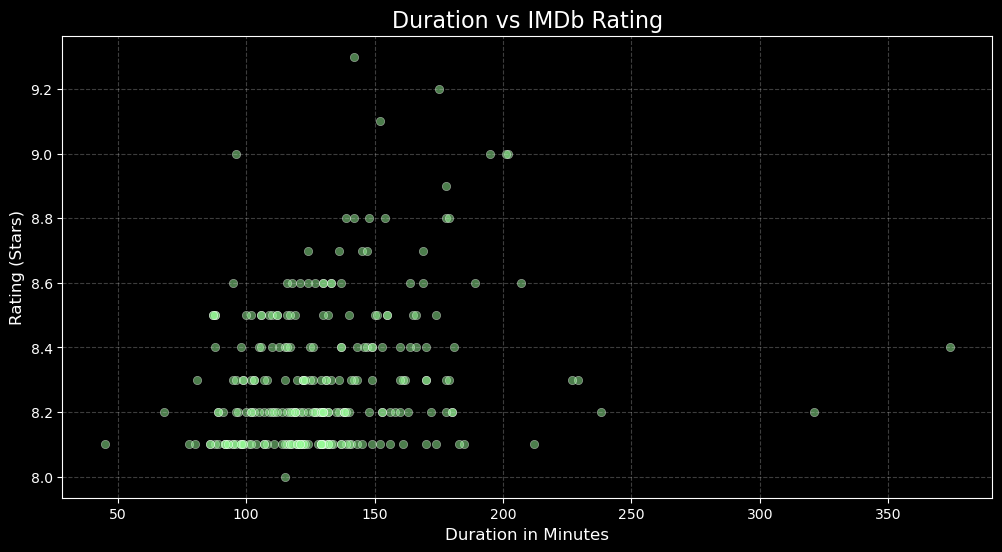

In [38]:
# size and style
plt.figure(figsize=(12,6))

# visualisation via scatterplot
ax = sns.scatterplot(data=imdb_data, x='Duration (min)', y='Rating', color='palegreen', alpha=0.5, edgecolor="#FFFFFF")

# showing the grid for readability
show_grid()

# labeling
ax.set_title('Duration vs IMDb Rating', fontsize=16)
ax.set_xlabel('Duration in Minutes', fontsize=12)
ax.set_ylabel('Rating (Stars)', fontsize=12)

plt.show()

#### Conclusion & Observation:

- No Correlation found: The scatter plot shows a vertical cloud rather than a diagonal line. This proves that runtime is not a predictor of quality. <br> 
  A 3-hour epic is not inherently better rated than a 90-minute compact story.

- The vast majority of top-tier movies cluster tightly between 90 and 150 minutes. This is the commercial "sweet spot" for cinema.

- Selection Bias: It is crucial to note that we are looking at a truncated dataset. The "worst" movie here still has an 8.0 rating. We are comparing greatness against greatness, which flattens the variance.

- Outliers: The extremes (very short or very long movies) are rare exceptions. The shortest film is likely a relic from the silent era, while the longest is a narrative anomaly.
---

**Follow Up Questions:**
- Which movie is the longest?

- Which movie is the shortest?

- Which movie has the best rating?

- Which movie has the worst rating?

In [39]:
# Finding the extremes

# getting the index of longest and shortest movie
idx_longest = imdb_data['Duration (secs)'].idxmax()
idx_shortest = imdb_data['Duration (secs)'].idxmin()

# getting the index of best and "worst" rated movies
idx_best = imdb_data['Rating'].idxmax()
idx_worst = imdb_data['Rating'].idxmin()

# storing them all into a dataframe
extremes = imdb_data.loc[[idx_longest, idx_shortest, idx_best, idx_worst]]

# displaying the extremes
extremes

,Title,Year,Duration (min),Duration (secs),Rating,Votes,Certification Rating
158,The Best of Youth,2003,374,22440,8.4,27071,R
204,Sherlock Jr.,1924,45,2700,8.1,64351,Passed
0,The Shawshank Redemption,1994,142,8520,9.3,3131912,R
231,The Incredibles,2004,115,6900,8.0,882482,PG


##### Follow Up Results:
- **Longest movie**: "The Best of Youth" - a two part movie of a novel

- **Shortest movie**: "Sherlock Jr" - classic from the silent movie area

- **Best Rated**: "The Shawshank Redemption" - a Stephen king Movie with overall very good ratings

- **"Worst" Rated**: "The Incredibles" - still a "masterpiece" but at the bottom of the list

### 2.3 Do movies with more votes tend to have higher ratings?

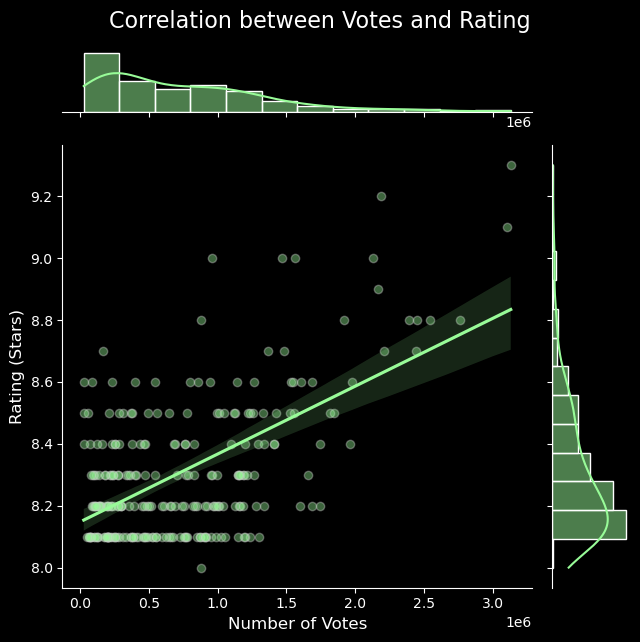

In [40]:
# Visualisation

# plotting a jointplot to see the trend & distribution
g = sns.jointplot(
    data=imdb_data, 
    x='Votes', y='Rating',
    kind='reg',  # showing a regression line for the trend
    color='palegreen', 
    height=6.5, space=0.2,
    scatter_kws={'alpha':0.4, 'edgecolor':'#cccccc'}
    )

# adjusting the labels 
g.set_axis_labels('Number of Votes', 'Rating (Stars)', fontsize=12)
g.fig.suptitle('Correlation between Votes and Rating', fontsize=16)

plt.tight_layout()
plt.show()

##### Conclusion & Observation:
-  Unlike the release year, the number of votes shows a distinct positive correlation with the rating. The regression line slopes upwards, indicating that the highest-rated movies are also the most watched.

- The "Blockbuster" Effect: The histogram at the top reveals a massive "Long Tail" distribution. The vast majority of movies have fewer than 500,000 votes.

- To achieve a legendary rating (above 9.0), a movie requires mass appeal. There are almost no "niche" movies in the top tier (9.0+); all of them have millions of votes. <br> 
  This suggests that to be widely recognized as a "masterpiece," a film must transcend its genre and reach a massive audience.

### 2.4 Does the certification rating influence the rating of the movie?

In [41]:
# small data cleaning first because missing values in certification
# filling the values with "Not Rated"
imdb_data['Certification Rating'] = imdb_data['Certification Rating'].fillna('Not Rated')

# verifying the data is clean now
print(imdb_data.isnull().sum())

Title                   0
Year                    0
Duration (min)          0
Duration (secs)         0
Rating                  0
Votes                   0
Certification Rating    0
dtype: int64


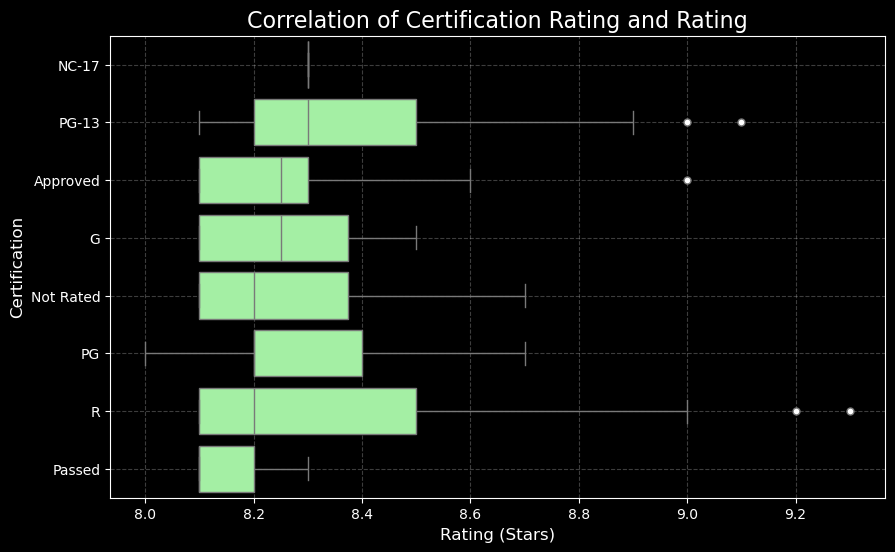

In [42]:
# Visualisation
# calculating the order - highest-rated categories on top -> median because boxplot
sorted_order = imdb_data.groupby('Certification Rating')['Rating'].median().sort_values(ascending=False).index  

# setup
plt.figure(figsize=(10,6))

# plotting a boxplot to compare the distribution of ratings for each category
ax = sns.boxplot(
    data=imdb_data,
    x='Rating', y='Certification Rating',
    order=sorted_order,
    color='palegreen',
    flierprops={'marker':'o', 'markerfacecolor':'white', 'markersize':5}
)

# showing the grid for readability
show_grid()

# labeling
ax.set_title('Correlation of Certification Rating and Rating', fontsize=16)
ax.set_xlabel('Rating (Stars)', fontsize=12)
ax.set_ylabel('Certification', fontsize=12)

plt.show()

##### Conclusion & Observations:
- The most important finding is that the median rating (the vertical line inside the box) is surprisingly consistent across all categories (~8.2). <br> 
  This proves that certification has no influence on quality. A "G" rated movie has the same probability of being a masterpiece as an "R" rated one.

- The "R" category shows the widest spread (variance) and contains the highest-rated outliers (the white dots on the right).  <br> This reflects the industry reality: Most serious dramas and crime epics (which often win awards) are rated R.

- The "NC-17" category appears as a single line, indicating a very small sample size (likely only 1 or 2 movies in the Top 250).  <br> It is statistically insignificant compared to the hundreds of R-rated films.

## 3. Correlations and Behaviour (Deep Dive)

### 3.1 How does the duration of the movie influence the amount of votes?

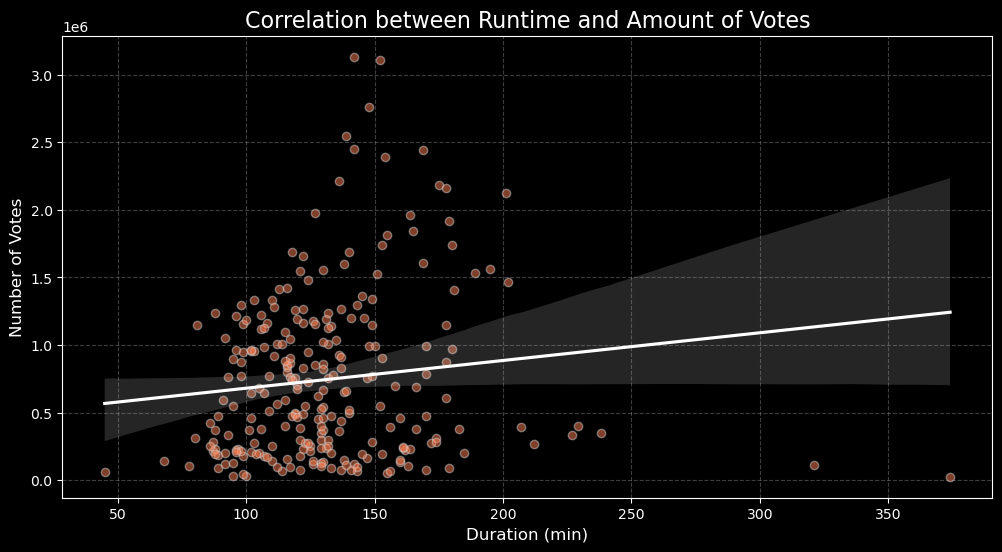

In [43]:
# Visualisation
# setup
plt.figure(figsize=(12,6))

# plotting a regplot to focus on correlation
ax = sns.regplot(
    data=imdb_data,
    x='Duration (min)', y='Votes',
    color='coral',
    scatter_kws={'alpha':0.5, 'edgecolor':'#cccccc'},
    line_kws={'color':'white'}
    )

# showing the grid for readability
show_grid()

# labelling
ax.set_title('Correlation between Runtime and Amount of Votes', fontsize=16)
ax.set_xlabel('Duration (min)', fontsize=12)
ax.set_ylabel('Number of Votes', fontsize=12)

plt.show()

##### Conclusion & Observation:
- Contrary to the fear that long movies might bore audiences, the positive slope of the regression line suggests the opposite: <br> 
  Longer movies tend to attract higher engagement (more votes). This is likely driven by famous franchises and "Event Movies" which often run over 2.5 hours.

- While the average vote count rises with duration, the sheer volume of top movies sits comfortably in the industry standard window of 90 to 150 minutes.
  
- Extreme runtimes act as a filter. The very shortest (under 80 min) and very longest (over 300 min) movies generally have significantly fewer votes, <br> 
  likely because they are niche productions or older classics with less mass appeal today.

### 3.2 Does the title length correlate with rating or popularity?

In [44]:
# Feature Engineering to calculate the length of each title - creating a new column
imdb_data['Title_Length'] = imdb_data['Title'].apply(len)

# checking if it worked
imdb_data.head()

,Title,Year,Duration (min),Duration (secs),Rating,Votes,Certification Rating,Title_Length
0,The Shawshank Redemption,1994,142,8520,9.3,3131912,R,24
1,The Godfather,1972,175,10500,9.2,2185484,R,13
2,The Dark Knight,2008,152,9120,9.1,3107811,PG-13,15
3,The Godfather Part II,1974,202,12120,9.0,1469364,R,21
4,12 Angry Men,1957,96,5760,9.0,962954,Approved,12


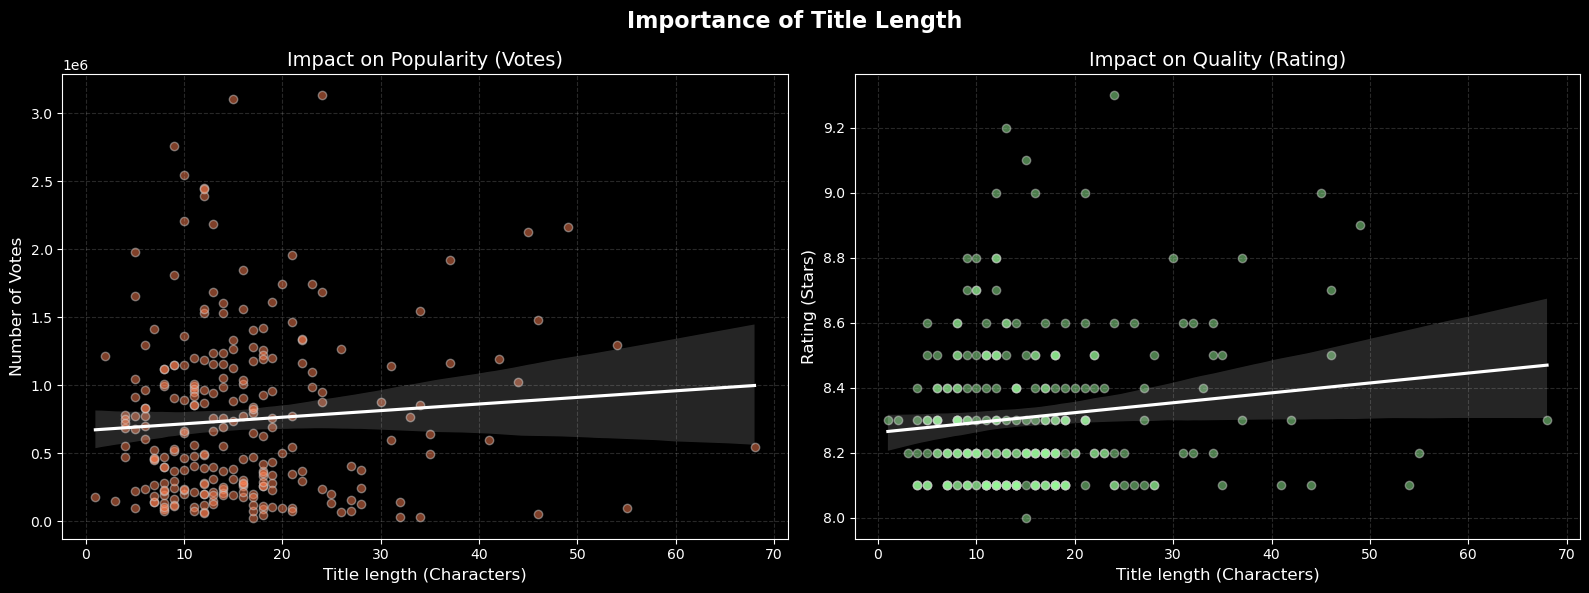

In [45]:
# Visualisation 
# setup
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# plotting a regplot to show title length vs votes 
ax1 = sns.regplot(
    data=imdb_data,
    x='Title_Length', y='Votes',
    color='coral',
    scatter_kws={'alpha':0.5,'edgecolor':'#cccccc'},
    line_kws={'color': 'white'},
    ax=axes[0]
)

# plotting another regplot to show title lenght vs rating
ax2 = sns.regplot(
    data=imdb_data,
    x='Title_Length', y='Rating',
    color='palegreen',
    scatter_kws={'alpha':0.5,'edgecolor':'#cccccc'},
    line_kws={'color': 'white'},
    ax=axes[1]
)

# setting up grids
for ax in axes:
    ax.grid(True,
         linestyle='--',
         linewidth=0.8,
         alpha=0.2,
         color='#cccccc'
         )

# labelling
fig.suptitle('Importance of Title Length', fontsize=16, weight='bold')

axes[0].set_title('Impact on Popularity (Votes)', fontsize=14)
axes[0].set_xlabel('Title length (Characters)', fontsize=12)
axes[0].set_ylabel('Number of Votes', fontsize=12)

axes[1].set_title('Impact on Quality (Rating)', fontsize=14)
axes[1].set_xlabel('Title length (Characters)', fontsize=12)
axes[1].set_ylabel('Rating (Stars)', fontsize=12)

plt.tight_layout()
plt.show()


##### Conclusions & Observation
- The cluster of data points clearly shows that short titles (10-20 characters) are the industry standard. They are punchy, easy to remember, and dominate the vote count.
  
- Interestingly, the regression line for Rating (Right Plot) shows a positive slope. This suggests that movies with longer, more complex titles tend to have slightly higher user ratings than movies with simple one-word titles.
  
-  While the trend is visible, the correlation is weak. A long title doesn't guarantee a hit, but it often signals a movie that takes itself seriously

### 3.3 Are there any "Hidden Gems" (High-Rated movies with low vote count vs. Blockbusters)

**Definition of a "Hidden Gem"**
- The movie needs to have a very high rating (> 8.5)
- Less votes than the median (< 600.000)

In [46]:
# checking movies which have a rating above 8.5 with a vote-count of the lower 25%
vote_threshold = imdb_data['Votes'].quantile(0.25)
rating_threshold = 8.5

# filtering the hidden gems
hidden_gems = imdb_data[
    (imdb_data['Rating'] >= rating_threshold) &
    (imdb_data['Votes'] < vote_threshold)
].sort_values(by='Rating', ascending=False)

# displaying only the relevant columns
print(f'Hidden Gems Sugesstion (Rating >= {rating_threshold} & Votes , {int(vote_threshold)}):')
display(hidden_gems[['Title', 'Year', 'Rating', 'Votes']])

Hidden Gems Sugesstion (Rating >= 8.5 & Votes , 237001):


,Title,Year,Rating,Votes
68,12th Fail,2023,8.7,164092
37,Harakiri,1962,8.6,87944
147,The Chaos Class Failed the Class,1975,8.6,29147
220,Jai Bhim,2021,8.6,231820
53,City Lights,1931,8.5,214203
167,Demon Slayer: Kimetsu no Yaiba Infinity Castle,2025,8.5,54507
240,Chainsaw Man - The Movie: Reze Arc,2025,8.5,30617


##### Conclusion & Observations:
- The "Hidden Gems" list is dominated by international productions. These films have world-class ratings but lack the global marketing machine of Hollywood, keeping their vote counts lower. <br> 
  
-  The 2025 entries (Demon Slayer, Chainsaw Man) show how dedicated Anime fanbases are. They vote quickly and highly, propelling these titles into the top tier immediately upon release. 
  
- City Lights (1931) appearing here is poignant. Despite being a Chaplin masterpiece, it has significantly fewer votes than modern hits, making it a "Hidden Gem" for younger generations who might have missed the silent era.

In [47]:
# Saving the cleaned and feature engineered dataset for the ML notebook
imdb_data.to_csv('imdb_top250_cleaned_for_ml.csv', index=False)

### Next Step: Predicting Movie Ratings

Based on the found correlation (Votes, Duration, Title Length) the next logical step is to build a **Machine Learning Model**.
- **Goal:** Predict the IMDb Rating based on available features
- **Approach:** Training a Regressen Model in a seperate Notebook